In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
data = pd.read_csv(r"C:\Users\Acer\Desktop\Project\Cognifyz_Technologies/dataset_cognifyz.csv")

In [9]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [11]:
data.tail(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


Level 3 Task 1 Restaurant Reviews

Analyze the text reviews to identify the most common positive and negative keywords


In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


In [20]:
key_words= data['Rating text']
key_words

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [40]:
!pip install nltk vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 262.6 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 245.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 479.1 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 530.8 kB/s eta 0:00:00


In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from collections import Counter

In [44]:
# Initialize stop words and sentiment analyzer
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()


In [46]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
positive=[]
negative=[]

In [56]:
for key_word in key_words:
    tokens= word_tokenize(key_word.lower())
    tokens=[token for token in tokens if token.isalpha() and token not in stop_words]
    
    sentiment_score=sia.polarity_scores(key_word)['compound']
    
    if sentiment_score>=0.2:
        positive.extend(tokens)
    elif sentiment_score<=0.2:
        negative.extend(tokens)

In [58]:
positive_counts=Counter(positive)
negative_counts=Counter(negative)

In [60]:
num_top_keywords = 10
print('\nTop positive:')
for keyword, count in positive_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top positive:
good:3179 times
excellent:301 times


In [62]:
print('\nTop Negative keywords:')
for keyword, count in negative_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top Negative keywords:
average:3737 times
rated:2148 times
poor:186 times


Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [72]:
import re
from statistics import mean

In [76]:
df_analyze=data[['Rating text','Aggregate rating']].copy()
df_analyze['Review Length']=df_analyze['Rating text'].apply(lambda x: len(str(x)))
ave_rev_len=df_analyze.groupby('Aggregate rating')['Review Length'].mean()

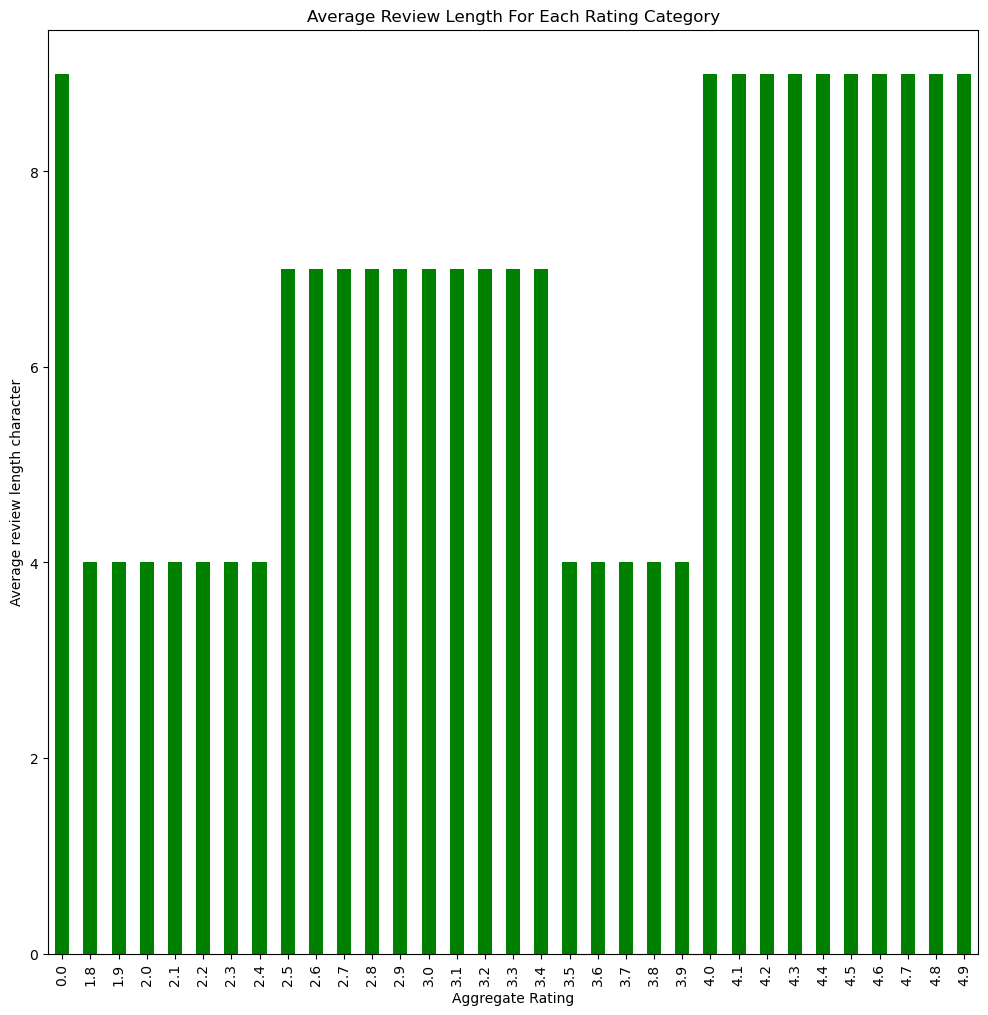

In [78]:
plt.figure(figsize=(12,12))
ave_rev_len.plot(kind='bar',color='green')
plt.title('Average Review Length For Each Rating Category')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average review length character')
plt.show()

Task 2: Votes Analysis

Identify the restaurants with the highest and lowest number of votes

In [82]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [84]:
df_votes=data[['Votes','Restaurant Name']]
df_votes

,Votes,Restaurant Name
0,314,Le Petit Souffle
1,591,Izakaya Kikufuji
2,270,Heat - Edsa Shangri-La
3,365,Ooma
4,229,Sambo Kojin
...,...,...
9546,788,Naml۱ Gurme
9547,1034,Ceviz A��ac۱
9548,661,Huqqa
9549,901,A���k Kahve


In [92]:
print ("Restaurants with the highest votes")
max_votes_resturants=df_votes.loc[df_votes['Votes'].idxmax()]
max_votes_resturants

Restaurants with the highest votes


Votes              10934
Restaurant Name     Toit
Name: 728, dtype: object

In [94]:
print ("Restaurants with the lowest votes")
min_votes_resturants=df_votes.loc[df_votes['Votes'].idxmin()]
min_votes_resturants

Restaurants with the lowest votes


Votes                             0
Restaurant Name    Cantinho da Gula
Name: 69, dtype: object

Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [97]:
from scipy.stats import pearsonr

In [101]:
correlation, p_value = pearsonr(data["Votes"], data["Aggregate rating"])

correlation, p_value

(0.3136905841954113, 4.215149194296304e-217)

In [103]:
df_analysis = data[['Votes','Aggregate rating']].copy()
df_analysis

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
...,...,...
9546,788,4.1
9547,1034,4.2
9548,661,3.7
9549,901,4.0


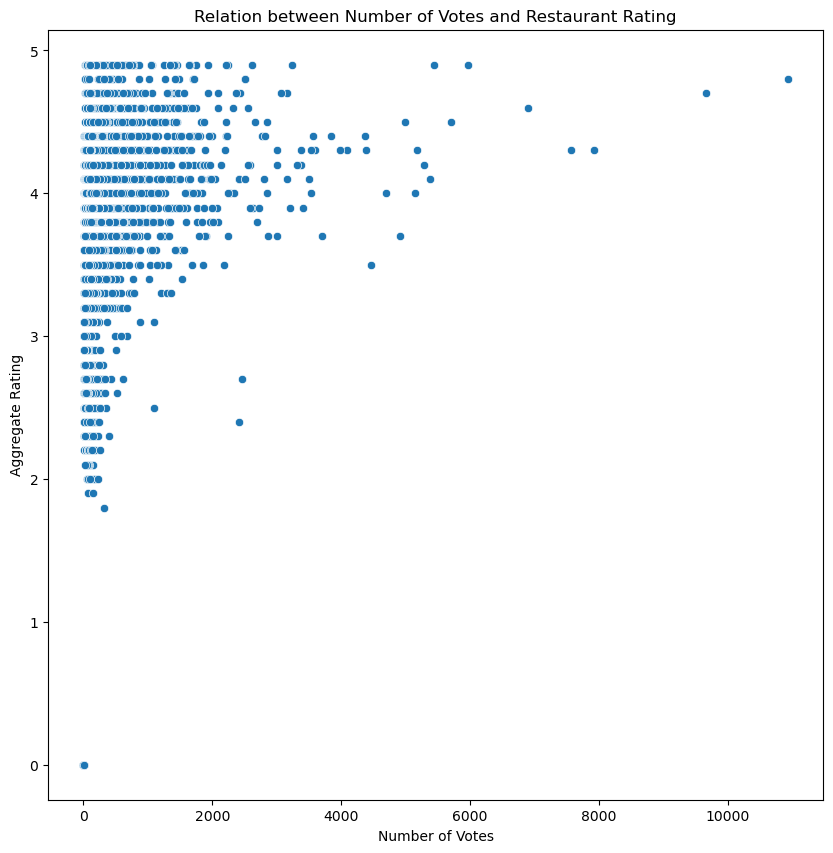

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Votes',y='Aggregate rating',data= df_analysis)
plt.title('Relation between Number of Votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

Task 3: Price Range vs. Online Delivery andTable Booking

Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [111]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [115]:
data_analysis=data[['Price range','Has Online delivery','Has Table booking']].copy()

In [117]:
data_analysis['Has Online delivery']=data_analysis['Has Online delivery'].map({'Yes':True,'No':False})
data_analysis['Has table booking']=data_analysis['Has Table booking'].map({'Yes':True,'No':False})

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
summary_table=pd.pivot_table(data_analysis,index='Price range',values=['Has Online delivery','Has table booking'],aggfunc=sum)

In [131]:
print('Summary Table:')
summary_table

Summary Table:


,Has Online delivery,Has table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


<Figure size 1000x800 with 0 Axes>

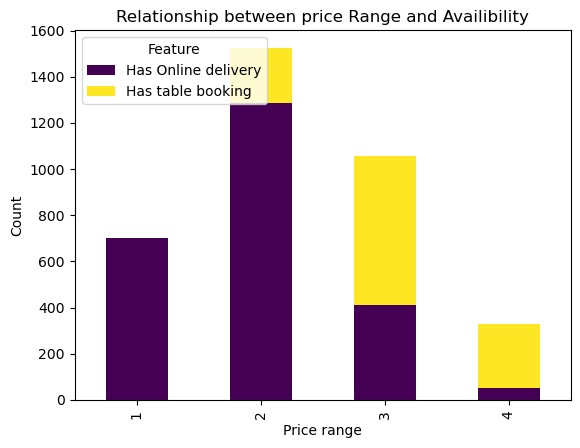

In [133]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Relationship between price Range and Availibility')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature',loc='upper left')
plt.show()

Determine if higher-priced restaurants are more likely to offer these services

In [136]:
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

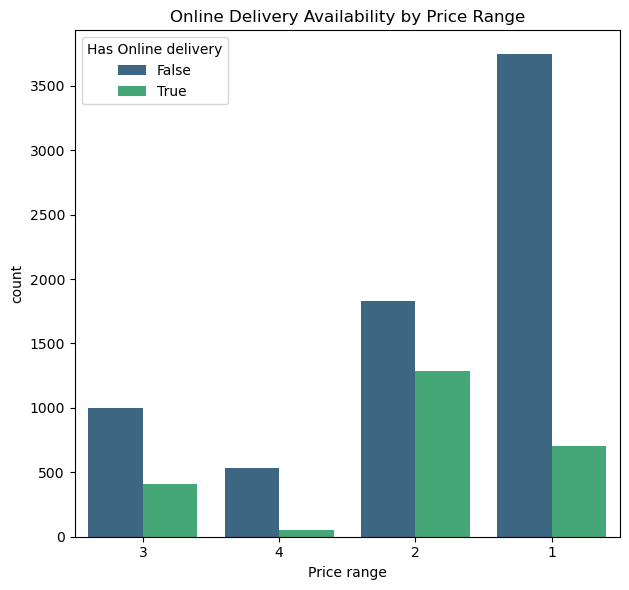

In [160]:
data_analysis['Price range'] = data_analysis['Price range'].astype(str)
data_analysis['Has Online delivery'] = data_analysis['Has Online delivery'].apply(lambda x: str(x) if isinstance(x, bool) else x)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Price range', hue='Has Online delivery', data=data_analysis, palette='viridis')
plt.title('Online Delivery Availability by Price Range')

plt.tight_layout()
plt.show()

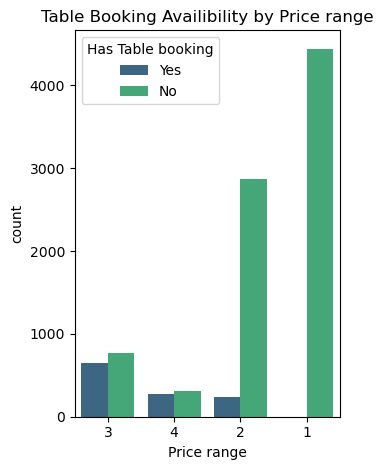

In [164]:
plt.subplot(1,2,2)
sns.countplot(x='Price range', hue='Has Table booking', data=data_analysis,palette='viridis')
plt.title('Table Booking Availibility by Price range')

plt.tight_layout()
plt.show()